In [6]:
import seaborn as sns
import pandas as pd

In [7]:
%matplotlib inline

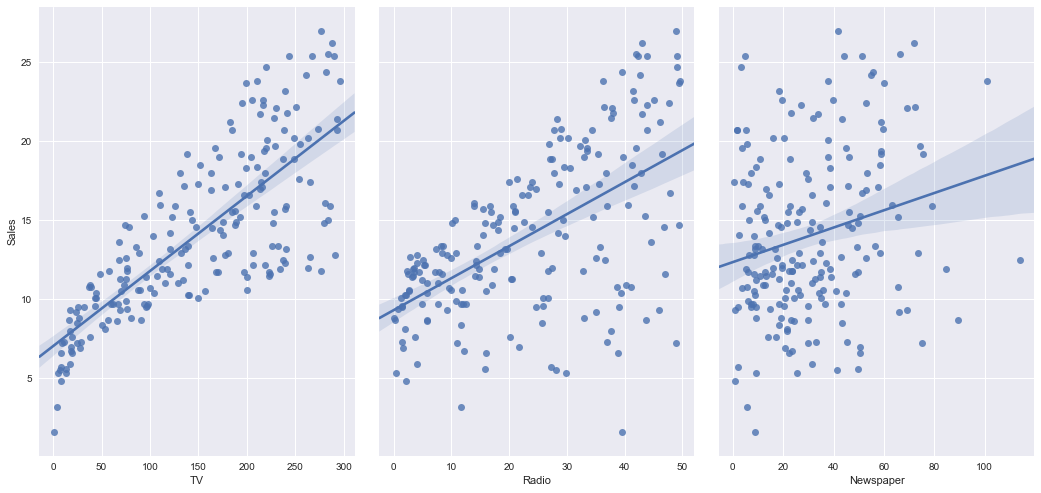

In [32]:
data = pd.read_csv('http://www-bcf.usc.edu/~gareth/ISL/Advertising.csv', index_col=0)
data.head()
sns.pairplot(data, x_vars=['TV', 'Radio', 'Newspaper'], y_vars='Sales', size=7, aspect=0.7, kind='reg')

In [34]:
from sklearn.linear_model import LinearRegression

In [35]:
feature_cols=['TV', 'Radio', 'Newspaper']

X = data[feature_cols]

y = data.Sales

In [37]:
from sklearn.cross_validation import train_test_split
lm = LinearRegression()
scores = cross_val_score(lm, X, y, cv=10, scoring='neg_mean_squared_error')
print scores

[-3.56038438 -3.29767522 -2.08943356 -2.82474283 -1.3027754  -1.74163618
 -8.17338214 -2.11409746 -3.04273109 -2.45281793]


In [38]:
mse_scores = -scores
print mse_scores

[ 3.56038438  3.29767522  2.08943356  2.82474283  1.3027754   1.74163618
  8.17338214  2.11409746  3.04273109  2.45281793]


In [39]:
rmse_scores = np.sqrt(mse_scores)
print rmse_scores

[ 1.88689808  1.81595022  1.44548731  1.68069713  1.14139187  1.31971064
  2.85891276  1.45399362  1.7443426   1.56614748]


In [40]:
print rmse_scores.mean()

1.69135317081


In [42]:
feature_cols = ['TV', 'Radio']
X = data[feature_cols]
print np.sqrt(-cross_val_score(lm, X, y, cv=10, scoring='neg_mean_squared_error')).mean()

1.67967484191


CROSS VALIDATION Techniques

In [16]:

import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn import metrics

linreg = LinearRegression()

feature_cols = ['TV', 'Radio']

X = data[ feature_cols ]

y = data.Sales

Xtrain, Xtest, ytrain, ytest = train_test_split(X, y, random_state=1)

linreg.fit(Xtrain, ytrain)

ypred = linreg.predict(Xtest)

print np.sqrt(metrics.mean_squared_error(ytest, ypred))

1.38790346994


In [20]:
from sklearn.cross_validation import KFold
from sklearn.datasets import load_iris
iris = load_iris()

X = iris.data
y = iris.target

from sklearn.neighbors import KNeighborsClassifier
from sklearn.cross_validation import cross_val_score
knn = KNeighborsClassifier(n_neighbors=5)
scores = cross_val_score(knn, X, y, cv=10, scoring='accuracy')
print scores

[ 1.          0.93333333  1.          1.          0.86666667  0.93333333
  0.93333333  1.          1.          1.        ]


In [21]:
print scores.mean()

0.966666666667


In [26]:
krange = range(1, 50)
kscores = []
for k in krange:
    knn = KNeighborsClassifier(n_neighbors=k)
    scores = cross_val_score(knn, X, y, cv=10, scoring='accuracy')
    kscores.append(scores.mean())
print kscores

[0.95999999999999996, 0.95333333333333337, 0.96666666666666656, 0.96666666666666656, 0.96666666666666679, 0.96666666666666679, 0.96666666666666679, 0.96666666666666679, 0.97333333333333338, 0.96666666666666679, 0.96666666666666679, 0.97333333333333338, 0.98000000000000009, 0.97333333333333338, 0.97333333333333338, 0.97333333333333338, 0.97333333333333338, 0.98000000000000009, 0.97333333333333338, 0.98000000000000009, 0.96666666666666656, 0.96666666666666656, 0.97333333333333338, 0.95999999999999996, 0.96666666666666656, 0.95999999999999996, 0.96666666666666656, 0.95333333333333337, 0.95333333333333337, 0.95333333333333337, 0.94666666666666666, 0.94666666666666666, 0.94666666666666666, 0.94666666666666666, 0.94666666666666666, 0.94666666666666666, 0.94666666666666666, 0.94666666666666666, 0.95333333333333337, 0.95333333333333337, 0.95333333333333337, 0.95333333333333337, 0.94666666666666666, 0.94000000000000006, 0.93333333333333335, 0.93333333333333335, 0.93333333333333335, 0.9333333333

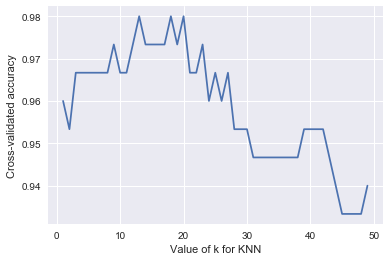

In [27]:
import matplotlib.pyplot as plt
%matplotlib inline

plt.plot(krange, kscores)
plt.xlabel('Value of k for KNN')
plt.ylabel('Cross-validated accuracy')

In [29]:
knn = KNeighborsClassifier(n_neighbors=20)
print cross_val_score(knn, X, y, cv=10, scoring='accuracy').mean()

0.98


In [30]:
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression()
print cross_val_score(logreg, X, y, cv=10, scoring='accuracy').mean()

0.953333333333
